In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/soup.py
%run ../../load_magic/storage.py
%pprint
import wikipedia
import numpy as np

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\Strauss–Howe\ipynb\DataFrame Exploration.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'Path', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_df', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', '

In [24]:

!start %windir%\explorer.exe "{os.path.abspath(s.saves_pickle_folder)}"

In [3]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        print("{} = s.load_object('{}')".format(df_name, df_name))
        print("{}".format(df_name))

archetypes_df = s.load_object('archetypes_df')
archetypes_df
colors_distance_df = s.load_object('colors_distance_df')
colors_distance_df
eras_df = s.load_object('eras_df')
eras_df
generations_df = s.load_object('generations_df')
generations_df
patriline_df = s.load_object('patriline_df')
patriline_df
saecula_df = s.load_object('saecula_df')
saecula_df
turnings_df = s.load_object('turnings_df')
turnings_df
turning_numbers_df = s.load_object('turning_numbers_df')
turning_numbers_df
us_presidents_df = s.load_object('us_presidents_df')
us_presidents_df



# Archetypes

In [5]:

archetypes_df = s.load_object('archetypes_df')
gen_list = []
for column_name, column_value in archetypes_df.T.primary_focus_coming_of_age.iteritems():
    n = ''
    if column_value[0] in list('aeiou'):
        n = 'n'
    gen_list.append('for the {} generation, the slap has a{} {} focus'.format(column_name, n, column_value))
print('According to Strauss-Howe generational theory, the "life slaps" are different for each generation: {}.'.format(conjunctify_list(gen_list)))

According to Strauss-Howe generational theory, the "life slaps" are different for each generation: for the Hero generation, the slap has an outer-world focus, for the Artist generation, the slap has an inter-dependency focus, for the Prophet generation, the slap has an inner-world focus, and for the Nomad generation, the slap has a self-sufficiency focus.


In [6]:

archetypes_df.T.sample(3).T

,Nomad,Prophet,Artist
archetypes,,,
generations,"Reprisal,Cavalier,Liberty,Gilded,Lost,X","Reformation,Puritan,Awakening,Transcendental,M...","Humanist,Parliamentary,Enlightenment,Compromis..."
reputation_as_child,bad,spirited,placid
coming_of_age,alienating,sanctifying,unfulfilling
primary_focus_coming_of_age,self-sufficiency,inner-world,inter-dependency
young_adulthood,competing,reflecting,improving
transition_in_midlife,frenetic to exhausted,detached to judgmental,conformist to experimental
leadership_style_entering_elderhood,"solitary,pragmatic","righteous,austere","pluralistic,indecisive"
reputation_as_elder,tough,wise,sensitive
treatment_as_elder,abandoned,respected,liked


In [7]:

tweet_str = 'According to Strauss-Howe generational theory, the {} of the {} archetype is one of being {}.'
for row_index, row_series in archetypes_df.iterrows():
    for column_name, column_value in row_series.iteritems():
        print(tweet_str.format(' '.join(row_index.split('_')), column_name, conjunctify_list(column_value.split(','))))

According to Strauss-Howe generational theory, the generations of the Hero archetype is one of being Arthurian, Elizabethan, Glorious, Republican, G.I., and Millennial.
According to Strauss-Howe generational theory, the generations of the Artist archetype is one of being Humanist, Parliamentary, Enlightenment, Compromise, Progressive, Silent, and Homelanders.
According to Strauss-Howe generational theory, the generations of the Prophet archetype is one of being Reformation, Puritan, Awakening, Transcendental, Missionary, and Boom.
According to Strauss-Howe generational theory, the generations of the Nomad archetype is one of being Reprisal, Cavalier, Liberty, Gilded, Lost, and X.
According to Strauss-Howe generational theory, the reputation as child of the Hero archetype is one of being good.
According to Strauss-Howe generational theory, the reputation as child of the Artist archetype is one of being placid.
According to Strauss-Howe generational theory, the reputation as child of the


# Eras

In [11]:

eras_df = s.load_object('eras_df')
eras_df

,1908–1929(Unraveling),1929–1946 (Crisis),1946–1964 (High),1964–1984(Awakening),1984–2008(Unraveling)
eras,,,,,
Key Events,Four Freedoms World War I Prohibition Scopes T...,Crash of 1929 New Deal Pearl Harbor D-Day,McCarthyism Levittown Affluent Society Little ...,Kent State Woodstock Watergate Tax Revolt,Perestroika National Debt Culture Wars Simpson...
Entering Elderhood (Age 63–83),Progressive (Artist) empathic,Missionary (Prophet) wise,Lost (Nomad) tough,G.I. (Hero) hubristic,Silent (Artist) empathic
Entering Midlife (Ages 42–62),Missionary (Prophet) moralistic,Lost (Nomad) pragmatic,G.I. (Hero) powerful,Silent (Artist) indecisive,Boom (Prophet) moralistic
Entering Young Adulthood (Ages 21–41),Lost (Nomad) alienated,G.I. (Hero) heroic,Silent (Artist) sensitive,Boom (Prophet) narcissistic,Gen X (Nomad) alienated
Entering Childhood (Ages 0–20),G.I. (Hero) protected,Silent (Artist) suffocated,Boom (Prophet) indulged,Gen X (Nomad) abandoned,Millennial (Hero) protected


In [12]:

print(eras_df.columns.tolist())
print(eras_df.index.tolist())

['1908–1929(Unraveling)', '1929–1946 (Crisis)', '1946–1964 (High)', '1964–1984(Awakening)', '1984–2008(Unraveling)']
['Key Events', 'Entering Elderhood (Age 63–83)', 'Entering Midlife (Ages 42–62)', 'Entering Young Adulthood (Ages 21–41)', 'Entering Childhood (Ages 0–20)']



# Generations

In [14]:

generations_df = s.load_object('generations_df')
generations_df.T.sample(7).T

,childhood_turning_description,turning_year_begin,generations_archetype,birth_year_end,childhood_turning_entered,saeculum_name,turning_year_end
generation_name,,,,,,,
Arthurian,Retreat from France,1435,Civic,1460,3,Late Medieval,1459
Humanist,War of the Roses,1459,Adaptive,1482,4,Late Medieval,1497
Reformation,Tudor Renaissance,1497,Idealist,1511,1,Reformation,1517
Reprisal,Protestant Reformation,1517,Reactive,1540,2,Reformation,1542
Elizabethan,"Marian Restoration, Counter-Reformation",1542,Civic,1565,3,Reformation,1569
Parliamentary,Armada Crisis,1569,Adaptive,1587,4,Reformation,1594
Puritan,Merrie England,1594,Idealist,1617,1,New World,1621
Cavalier,"Puritan Awakening,Antinomian Controversy",1621,Reactive,1647,2,New World,1649
Glorious,"English Civil War, Republic, Restoration",1649,Civic,1673,3,New World,1675



# The Babbitt Patriline

In [18]:

patriline_df = s.load_object('patriline_df')
patriline_df.T.sample(8).T

,place_of_birth,css4_color,year_of_death,css4_text_color,place_of_death,date_of_birth,date_of_death,birth_coordinates
patriarch_name,,,,,,,,
Stephen Elkanah Babbitt,"Beverly, MA, United States",aqua,NaN,black,Not anywhere,5-Nov-90,Not yet,"-70.87556005,42.56414803,0"
David George Babbitt,"Flagstaff, AZ, United States",darkturquoise,NaN,black,Not anywhere,12-Jul-61,Not yet,"-111.6438675,35.2088123,0"
"Joseph Robert Babbitt, Jr.","Mesa, Maricopa County, Arizona, United States",yellow,2002,black,"NM, United States (Multiple Myloma (Cancer))",6-Apr-32,"March 31, 2002 (69)","-111.8078,33.39544,0"
"Joseph Robert Babbitt, Sr.","Flagstaff, Coconino, AZ, United States",gold,1968,black,"Flagstaff, Coconino, AZ, U","May 04, 1891","March 19, 1968 (76)","-111.64311,35.18132,0"
"David William Babbitt, Jr.","Cincinnati, Hamilton, OH, United States",fuchsia,1929,black,"Flagstaff, Coconino, AZ, United States","May 14, 1858","November 08, 1929 (71)","-84.61028,39.13622,0"
"David William Babbitt, Sr.","Berkshire, Berkshire, MA, United States",darkviolet,1868,white,"Cinncinnati, Hamilton, OH, United States","May 04, 1821","October 13, 1868 (47)","-73.50817,42.39594,0"
William David Babbitt,"Berkshire, Berkshire, MA, United States",blue,1861,white,"Berkshire, Berkshire, MA, United States","October 26, 1791","May 28, 1861 (69)","-73.50817,42.39594,0"
David Babbitt,"Lanesborough, Berkshire, MA, United States",darkblue,1816,white,"Lanesborough, Berkshire, MA",1766,"September 08, 1816 (50)","-73.27176,42.53495,0"
"Elkanah Babbitt, IV","New Milford, New Haven County, Connecticut",royalblue,1807,black,"Fly Creek, Otsego County, New York, United States","December 05, 1737","February 09, 1807 (69)","-73.08533,41.22308,0"



# Saecula

In [16]:

saecula_df = s.load_object('saecula_df')
print(saecula_df.columns.tolist())
saecula_df.T.sample(6).T

['awakening_name', 'awakening_climax_year', 'awakening_year_begin', 'awakening_year_end', 'crisis_name', 'crisis_climax_year', 'crisis_year_begin', 'crisis_year_end', 'years_from_crisis_to_awakening', 'years_from_awakening_to_crisis', 'years_from_crisis_to_crisis']


,years_from_crisis_to_crisis,awakening_year_begin,awakening_climax_year,years_from_awakening_to_crisis,awakening_name,crisis_year_begin
Saeculum,,,,,,
Late Medieval,NaN,NaN,NaN,NaN,NaN,1459
Reformation,103,1517,1536,52,Protestant Reformation,1569
New World,101,1621,1640,49,Puritan Awakening,1675
Revolutionary,92,1727,1741,40,Great Awakening,1773
Civil War,82,1822,1831,32,Transcendental Awakening,1860
Great Power,81,1886,1896,48,Third Great Awakening,1929
Millennial,81,1964,1974,51,Consciousness Revolution,2008


In [34]:

columns_list = [cn for cn in saecula_df.columns if 'crisis' in cn.lower()]
saecula_df[columns_list]

,crisis_name,crisis_climax_year,crisis_year_begin,crisis_year_end,years_from_crisis_to_awakening,years_from_awakening_to_crisis,years_from_crisis_to_crisis
Saeculum,,,,,,,
Late Medieval,Wars of the Roses,1485,1459,1487,NaN,NaN,NaN
Reformation,Armada Crisis,1588,1569,1594,51.0,52.0,103.0
New World,Glorious Revolution,1689,1675,1704,52.0,49.0,101.0
Revolutionary,American Revolution,1781,1773,1794,52.0,40.0,92.0
Civil War,Civil War,1863,1860,1865,50.0,32.0,82.0
Great Power,Great Depression and World War II,1944,1929,1946,33.0,48.0,81.0
Millennial,Global Financial Crisis,2025,2008,2029,30.0,51.0,81.0


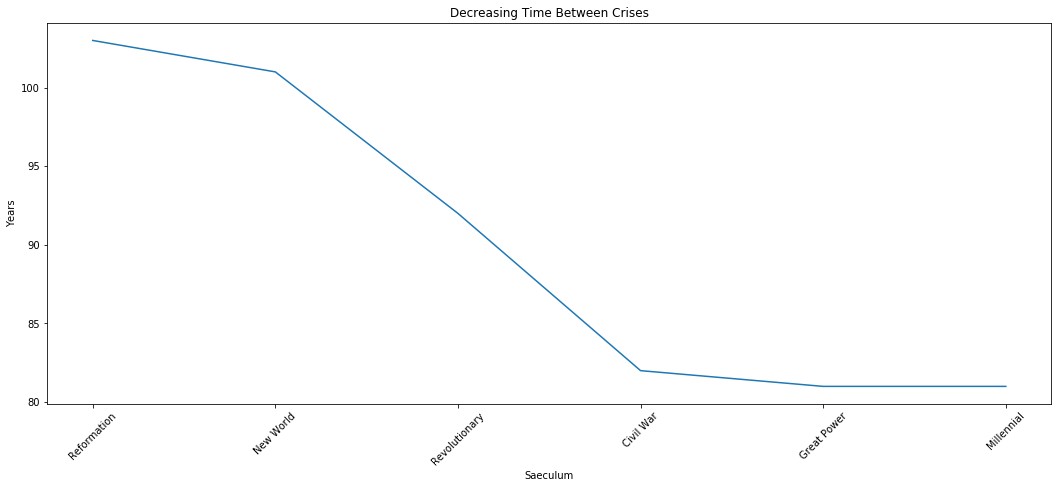

In [78]:

c = saecula_df.years_from_crisis_to_crisis.plot
fig, ax = plt.subplots(figsize=(18, 7))
AxesSubplot_obj = c.line(ax=ax, title='Decreasing Time Between Crises', rot=45)
ylabel_text = ax.set_ylabel('Years')

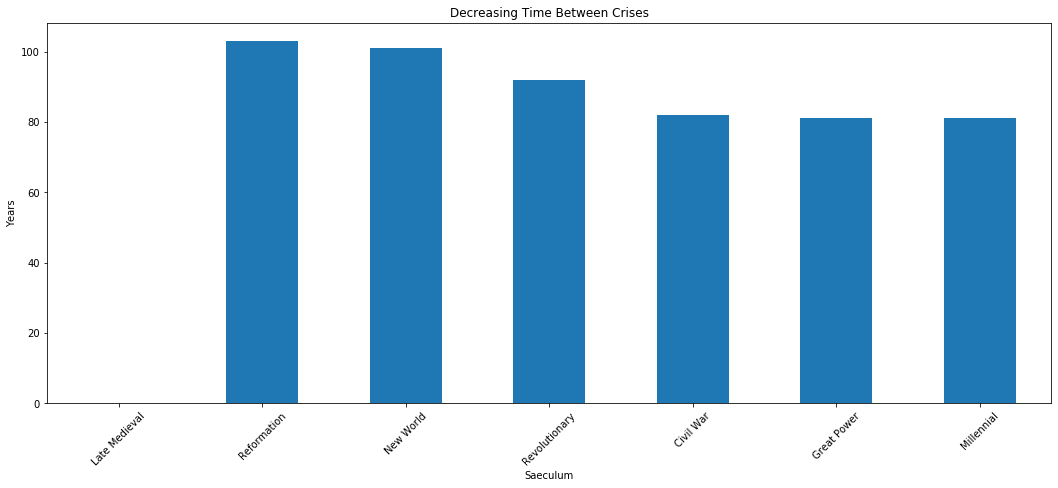

In [79]:

c = saecula_df.years_from_crisis_to_crisis.plot
fig, ax = plt.subplots(figsize=(18, 7))
AxesSubplot_obj = c.bar(ax=ax, title='Decreasing Time Between Crises', rot=45)
ylabel_text = ax.set_ylabel('Years')

In [17]:

columns_list = ['crisis_name', 'crisis_climax_year', 'crisis_year_begin', 'crisis_year_end']
saecula_df[columns_list]

,crisis_name,crisis_climax_year,crisis_year_begin,crisis_year_end
Saeculum,,,,
Late Medieval,Wars of the Roses,1485,1459,1487
Reformation,Armada Crisis,1588,1569,1594
New World,Glorious Revolution,1689,1675,1704
Revolutionary,American Revolution,1781,1773,1794
Civil War,Civil War,1863,1860,1865
Great Power,Great Depression and World War II,1944,1929,1946
Millennial,Global Financial Crisis,2025,2008,2029



---
# Turnings

In [19]:

turnings_df = s.load_object('turnings_df')
turnings_df.T.sample(8).T

,entering_childhood,saeculum_name,entering_young_adulthood,entering_midlife,turning_number,turning_year_end,turning_notes,entering_elderhood
turning_name,,,,,,,,
Retreat from France,Arthurians,Late Medeival,NaN,NaN,3,1459,"Retreat from France (Third Turning, 1435–1459)...",NaN
The War of the Roses,Humanists,Late Medeival,Arthurians,NaN,4,1487,"The War of the Roses (Fourth Turning, 1459–148...",NaN
The Tudor Renaissance,Reformation,Tudor,Humanists,Arthurians,1,1517,"The Tudor Renaissance (First Turning, 1487–151...",NaN
The Protestant Reformation,Reprisal,Tudor,Reformation,Humanists,2,1542,"The Protestant Reformation (Second Turning, 15...",Arthurians
Intolerance and Martyrdom,Elizabethans,Tudor,Reprisal,Reformation,3,1569,"Intolerance and Martyrdom (Third Turning, 1542...",Humanists
The Armada Crisis,Parliamentarians,Tudor,Elizabethans,Reprisal,4,1594,"The Armada Crisis (Fourth Turning, 1569–1594) ...",Reformation
Merrie England,Puritans,New World,Parliamentarians,Elizabethans,1,1621,"Merrie England (First Turning, 1594–1621) was ...",Reprisal
The Puritan Awakening,Cavaliers,New World,Puritans,Parliamentarians,2,1649,"The Puritan Awakening (Second Turning, 1621–16...",Elizabethans
Reaction and Restoration,Glorious,New World,Cavaliers,Puritans,3,1675,"Reaction and Restoration (Third Turning, 1649–...",Parliamentarians



---
# Turning Numbers

In [22]:

turning_numbers_df = s.load_object('turning_numbers_df')
turning_numbers_df.T.sample(10).T

,families,child_nurture,culture,vision_of_future,institutions,worldview,midlife,wars,social_structure,ideals
1,Strong,Loosening,Innocent,Brightening,Reinforced,Simple,Hero,Restorative,Unified,Settled
2,Weakening,Underprotective,Passionate,Euphoric,Attacked,Complicating,Artist,Controversial,Splintering,Discovered
3,Weak,Tightening,Cynical,Darkening,Eroded,Complex,Prophet,Inconclusive,Diversified,Debated
4,Strengthening,Overprotective,Practical,Urgent,Founded,Simplifying,Nomad,Total,Gravitating,Championed


In [29]:

import sys

command_str = '{sys.executable} -m pip install --upgrade inflect'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade inflect


In [30]:

import inflect

p = inflect.engine()
for i in range(1, 25, 5):
    print(p.ordinal(i))

1st
6th
11th
16th
21st


In [32]:

tweet_str = 'According to Strauss-Howe generational theory, the {} of the {} turning is one of being {}.'
for row_index, row_series in turning_numbers_df.iterrows():
    print()
    for column_name, column_value in row_series.iteritems():
        print(tweet_str.format(' '.join(column_name.split('_')), p.ordinal(row_index), conjunctify_list(column_value.split(','))))


According to Strauss-Howe generational theory, the elderhoood of the 1st turning is one of being Nomad.
According to Strauss-Howe generational theory, the midlife of the 1st turning is one of being Hero.
According to Strauss-Howe generational theory, the young adulthood of the 1st turning is one of being Artist.
According to Strauss-Howe generational theory, the childhood of the 1st turning is one of being Prophet.
According to Strauss-Howe generational theory, the families of the 1st turning is one of being Strong.
According to Strauss-Howe generational theory, the child nurture of the 1st turning is one of being Loosening.
According to Strauss-Howe generational theory, the gap between gender roles of the 1st turning is one of being Maximum.
According to Strauss-Howe generational theory, the ideals of the 1st turning is one of being Settled.
According to Strauss-Howe generational theory, the institutions of the 1st turning is one of being Reinforced.
According to Strauss-Howe generat


---
# US Presidents

In [27]:

us_presidents_df = s.load_object('us_presidents_df')
columns_list = ['turning_number', 'office_rank']
us_presidents_df.sort_values(columns_list)

,date_of_birth,birthplace,state_of_birth,office_rank,reign_begin,reign_end,generation_name,turning_name,turning_number
President,,,,,,,,,
John Adams,1735-10-30,Braintree,Massachusetts,2,1797-03-04,1801-03-04,Liberty,The Era of Good Feelings,1
Thomas Jefferson,1743-04-13,Shadwell,Virginia,3,1801-03-04,1809-03-04,Republican,The Era of Good Feelings,1
James Madison,1751-03-16,Port Conway,Virginia,4,1809-03-04,1817-03-04,Republican,The Era of Good Feelings,1
James Monroe,1758-04-28,Monroe Hall,Virginia,5,1817-03-04,1825-03-04,Republican,The Era of Good Feelings,1
Andrew Johnson,1808-12-29,Raleigh,North Carolina,17,1865-04-15,1869-03-04,Transcendental,Reconstruction & Gilded Age,1
Ulysses S. Grant,1822-04-27,Point Pleasant,Ohio,18,1869-03-04,1877-03-04,Gilded,Reconstruction & Gilded Age,1
Rutherford B. Hayes,1822-10-04,Delaware,Ohio,19,1877-03-04,1881-03-04,Gilded,Reconstruction & Gilded Age,1
James A. Garfield,1831-11-19,Moreland Hills,Ohio,20,1881-03-04,1881-09-19,Gilded,Reconstruction & Gilded Age,1
Chester A. Arthur,1829-10-05,Fairfield,Vermont,21,1881-09-19,1885-03-04,Gilded,Reconstruction & Gilded Age,1



---
# Data Cleaning

In [5]:

tables_url = 'https://en.wikipedia.org/wiki/Strauss%E2%80%93Howe_generational_theory'
tables_list = get_page_tables(tables_url)

[(5, (32, 5)), (4, (10, 1)), (6, (5, 2)), (0, (4, 2)), (1, (1, 2)), (2, (1, 2)), (3, (1, 2)), (7, (1, 2))]


In [13]:

tables_list[5]

,Generation,Generation Archetype,Generation Birth Year Span,Entered childhood in a,Turning Year Span
,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum
0,Arthurian Generation,Hero (Civic),1433–1460 (28),3rd Turning: Unraveling: Retreat from France,1435–1459 (24)[a]
1,Humanist Generation,Artist (Adaptive),1461–1482 (22),4th Turning: Crisis: War of the Roses,1459–1497 (38)
2,Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years)
3,Reformation Generation,Prophet (Idealist),1483–1511 (28),1st Turning: High: Tudor Renaissance,1497–1517 (20)
4,Reprisal Generation,Nomad (Reactive),1512–1540 (29),2nd Turning: Awakening: Protestant Reformation,1517–1542 (25)
5,Elizabethan Generation,Hero (Civic),1541–1565 (24),3rd Turning: Unraveling: Reaction & Restoration,1542–1569 (27)
6,Parliamentary Generation,Artist (Adaptive),1566–1587 (22),4th Turning: Crisis: Armada Crisis,1569–1594 (25)
7,New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years)
8,Puritan Generation,Prophet (Idealist),1588–1617 (30),1st Turning: High: Merrie England,1594–1621 (27)


In [13]:

list_regex = re.compile(r'[ —]+')
generations_str = archetypes_df.loc['generations', 'Hero']
archetypes_df.loc['generations', 'Hero'] = ','.join(list_regex.split(generations_str, 0))
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [17]:

archetypes_df.loc['generations', 'Artist'] = 'Humanist,Parliamentary,Enlightenment,Compromise,Progressive,Silent,Homelanders'
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [19]:

list_regex = re.compile(r'[ —]+')
generations_str = archetypes_df.loc['generations', 'Prophet']
archetypes_df.loc['generations', 'Prophet'] = ','.join(list_regex.split(generations_str, 0))
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [21]:

archetypes_df.loc['generations', 'Nomad'] = 'Reprisal,Cavalier,Liberty,Gilded,Lost,X'
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [10]:

crisis_climax_year = 1689
saecula_df.loc['New World', 'crisis_climax_year'] = crisis_climax_year
s.store_objects(saecula_df=saecula_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\saecula_df.pickle


In [26]:

columns_list = ['turning_number', 'office_rank']
for column_name in columns_list:
    us_presidents_df[column_name] = us_presidents_df[column_name].map(lambda x: int(x))
s.store_objects(us_presidents_df=us_presidents_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\us_presidents_df.pickle
